<a href="https://colab.research.google.com/github/Hongjieun123/deeplearning-project/blob/master/MNIST(keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print( train_images.shape, train_labels )    #3차원 텐서 (60000, 28(높이), 28(폭))

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) [5 0 4 ... 5 6 8]


In [4]:
train_images.shape

(60000, 28, 28)

In [6]:
print (len(train_labels), train_images.shape[0])
a, b, c = train_images.shape
print (a, b, c)

60000 60000
60000 28 28


In [7]:
train_labels[0]

5

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

5


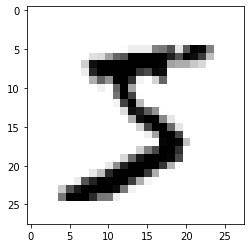

In [12]:
import matplotlib.pyplot as plt
digit = train_images[0]
print (train_labels[0])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [0]:
from keras import models
from keras import layers

network = models.Sequential()   #순차적으로 쌓겠다. add로 뭘 쌓고자 하는지만 넣어주면 된다.
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255      #왜 하냐면 ? 0~255까지 있기 때문에 정규화 해줌

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.2555 - accuracy: 0.9260
Epoch 2/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.1020 - accuracy: 0.9697
Epoch 3/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0685 - accuracy: 0.9796
Epoch 4/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0503 - accuracy: 0.9849
Epoch 5/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.0383 - accuracy: 0.9886


In [19]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 52us/step


In [20]:
print('test_acc:', test_acc)

test_acc: 0.9797000288963318


In [32]:
(test_images[0].shape)

(784,)

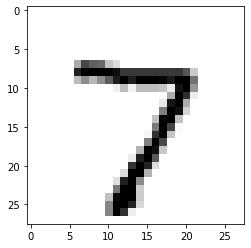

In [24]:
import numpy as np
import matplotlib.pyplot as plt
digit = np.reshape(test_images[0], (28,28))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()